# [Blog home](http://rajeshrinet.github.io/blog)
$$
$$

## Solving partial differential equations
Differential equations are ubiquitous in physics. Also, in many interesting cases they are not tractable analytically. So we take recourse to numerical methods, every now and then, to solve these differential equations. In this talk we will discuss some basics of solving PDEs on the computer. 


### Forward difference
Let denote the space derivative by '. The first derivative of the function can be written in discrete form as

$$  f'(x)  \approx \frac{f(x+h)-f(x)}{h} $$

This is called forward difference as this uses $f(x)$ and $f(x+h)$.  

$$  f'(x)  = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h)$$

### Backward difference
$$  f'(x)  \approx \frac{f(x)-f(x-h)}{h} $$

This way to calculate first derivative is called backward difference as this uses $f(x)$ and $f(x-h)$. 

$$  f'(x)  = \frac{f(x)-f(x-h)}{h} + \mathcal{O}(h)$$

### Central difference

$$  f'(x)  \approx \frac{f(x+h)-f(x-h)}{2h} $$

The error in this case is $ \mathcal{O}(h^2)$

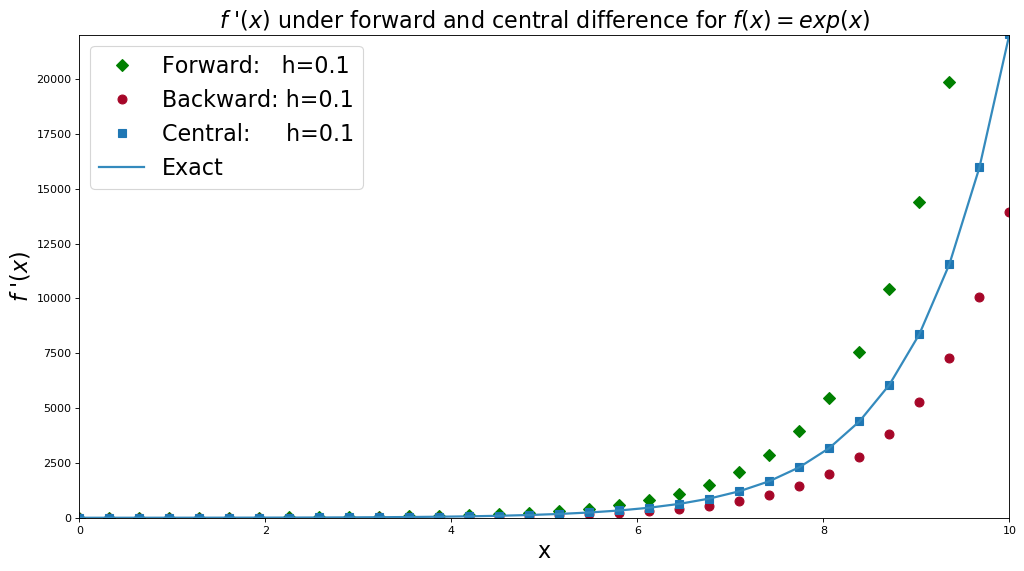

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#parameters
a, b, h_, N = 0, 10, .1, 32

def forwardDifference(f, h=h_):
    '''     f' = ( f(x+h)-f(x) )/h + O(h)   '''
    return ( f(x+h)-f(x) )/h

def backwardDifference(f, h=h_):
    '''    f' = ( f(x)-f(x-h) )/h + O(h)    '''
    return ( f(x)-f(x-h) )/h

def centralDifference(f, h=h_):
    '''    f' = (f(x+h) - f(x-h))/h + O(h^2)'''
    return (f(x+h) - f(x-h))/(2*h)

# test Function
def f(x):
    return np.exp(x)

#Main body
x_ = np.linspace(a, b, N)
forward = []
backward = []
forward_h2 = []
central = [];

for x in x_:
    forward.append( forwardDifference(f, 1) )
    backward.append( backwardDifference(f, 1) )
    forward_h2.append(forwardDifference(f ) )
    central.append( centralDifference(f) )

# Plotting
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.axis([a,b,0,np.exp(b)])
plt.plot(x_,forward,'D',  ms=8,  color='g',                label='Forward:   h=%g'%h_)
plt.plot(x_,backward,'o', color="#A60628", ms=8, label='Backward: h=%g'% h_)
plt.plot(x_,central,'s', ms=8,      label='Central:     h=%g'%h_)
plt.plot(x_,f(x_),'-', color="#348ABD", linewidth=2, label='Exact',)
 
plt.legend(loc='upper left', fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("$f$ '$(x)$", fontsize=20)
plt.title("$f$ '$(x)$ under forward and central difference for $f(x)=exp(x)$", fontsize=20);
plt.show()

## Diffusion equation

Lets solve diffusion using the machinery we have developed above.

$$ \frac{\partial}{\partial t} c = D\nabla^2 c; \qquad  c=c_0 \text{ at } t=0$$    

The steps involved are

 * construct a discretized Laplacian
 * evolve in time

Laplacian can be constructed by applying the central difference twice, for step size $h/2$ 

$$\nabla^2  f(x) \approx \frac{f(x_{i-1}) - 2 f(x_i) + f(x_{i+1})}{h^2}$$

In [2]:
## Class to simulate the diffusion equation
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class simulateDiffusion(): 
    def __init__(self):
        pass

    def Gaussian(self, mean,sigma,x):
        ''' Returns Gaussian distribution''' 
        return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mean)**2/sigma**2)
    
    def Laplacian(self, u, h ):
        ''' calculates the Laplcian of a  given u(x,t)'''
        Laplacian_ = np.zeros(u.shape, np.float) 
        
        for i in range(1, len(u)-1):
            Laplacian_[i] = (u[i+1] - 2*u[i]+u[i-1])/h**2
        
        # at the boundaries we assume that u does not change u[0]=u[1] and u[N]= u[N-1]
        i = 0
        Laplacian_[i] = (u[i+1] - 2*u[i]+u[i])/h**2
        i = -1 # or len(u)-1
        Laplacian_[i] = (u[i] - 2*u[i]+u[i-1])/h**2
        return Laplacian_
        
   
    def simulate(self, u, x, a, D, T, h):
        ''' simulates and gives the snapshots of the configurations for some time instant '''
        plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
        for i in range(T):
            f_ = D*self.Laplacian(u, h)
            u = u + dt*f_
                    
            if i==  0  or i==int(T/8) or i==int(T/4) or i==int(T/2):# or i==T-1:
                plt.axis([-a, a, 0, 1])  
                plt.plot(x,u,'-o', color="#A60628", alpha= .1 + (1.5*i/T), label='Time = %g'%i, linewidth=3)   
         
        plt.legend(loc='upper left', fontsize=20)
        plt.xlabel("x", fontsize=20)
        plt.ylabel("u(x)", fontsize=20)
        #plt.ylim([0, 0.6])
        plt.title("Diffusion of a Gaussian distribution at origin at T=0.", fontsize=20)
        plt.show()

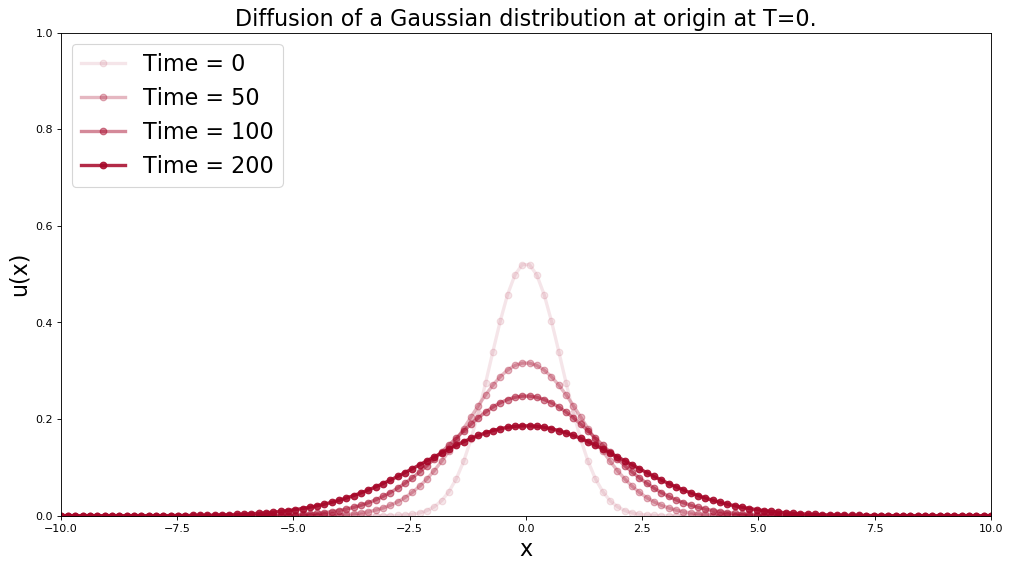

In [3]:
## This block simulates the diffusion equation for an initial Gaussian disturbance at the origin in 1d
from __future__ import division
# parameters
a, N, T, dt = 10, 128, 400, 0.01
x = np.linspace(-a, a, N) 
h = x[1]-x[0]       
D = 1.                         #Diffusion coefficient

# instantiate the class
rm = simulateDiffusion()

# initial configuration
u = rm.Gaussian(mean=0.,sigma=.75,x=x)

# Simulate 
rm.simulate(u, x, a, D, T, h)
plt.show()
## Simulation completed!

The diffusion equation can be solved by Fourier transform
$$c(x,t) =\frac{1}{2\pi}\int dk\,  e^{ikx}\, \hat c (k,t) $$

This gives the solution 
$$\hat c (k,t)= \hat c_0 (k) \exp(-Dk^2 t)$$

So the final solution is
$$c(x,t) =\frac{1}{2\pi}\int dk\,  e^{ikx}\, \hat c_0 (k) \exp(-Dk^2 t) $$

Clearly for initial Gaussian distribution, the final solution will be Gaussian. For a simpler case of initial delta distribution, $c_0 (k)=1$, we get a Gaussian distribution.

Things change for a step function such that initial distribution is non-zero for $x>a$. The solution in that case is given as
$$c(x,t) = \frac12 \left( 1+ \mathrm{erf} \frac{x-a}{\sqrt{4Dt}}  \right)$$

In general, the above can be extended to many barriers. Below with simulate diffusion equation for the initial condition $|x|>a$.

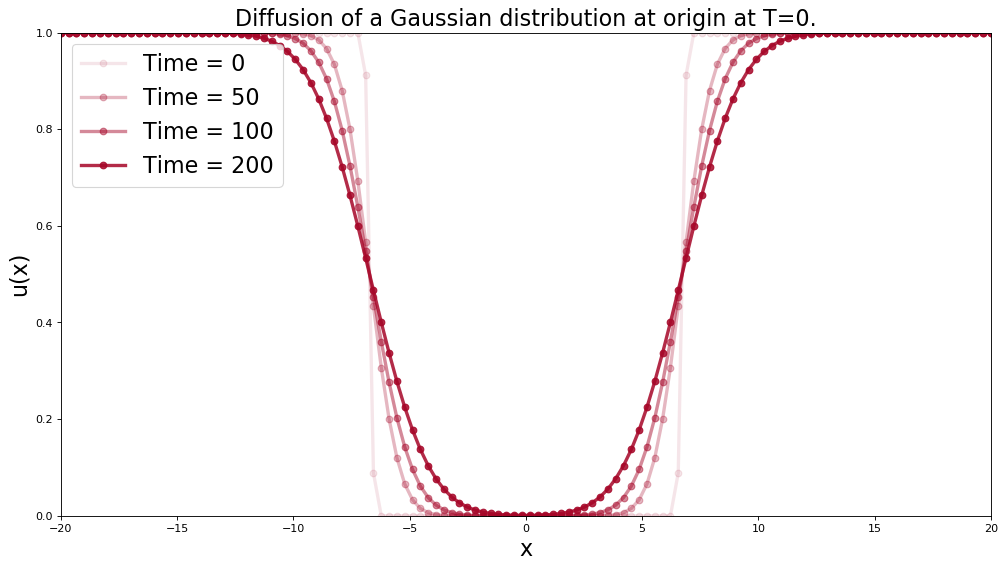

In [9]:
## This block simulates the diffusion equation for a step initial condition
from __future__ import division
# parameters
a, N, T, dt = 20, 120, 400, 0.01
x = np.linspace(-a, a, N) 
h = x[1]-x[0]       
D = 1.                         #Diffusion coefficient

# instantiate the class
rm = simulateDiffusion()

# initial configuration
u = x*0
u[0:40]=1
u[80:120]=1
 
# Simulate 
rm.simulate(u, x, a, D, T, h)
plt.show()
## Simulation completed!

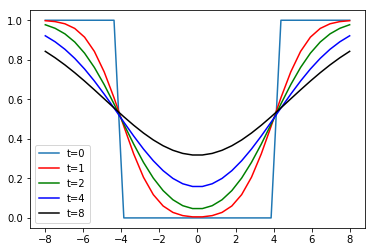

In [7]:
#plot of exact solution
x = np.linspace(-8, 8, 32)
t=0.00001
y = 0.5*(2 + np.erf((x-4)/(np.sqrt(4*t)))  - np.erf((x+4)/(np.sqrt(4*t))))
plt.plot(x, y, label='t=0')
t=1
y = 0.5*(2 + np.erf((x-4)/(np.sqrt(4*t)))  - np.erf((x+4)/(np.sqrt(4*t))))
plt.plot(x, y, 'r-', label='t=1')
t=2
y = 0.5*(2 + np.erf((x-4)/(np.sqrt(4*t)))  - np.erf((x+4)/(np.sqrt(4*t))))
plt.plot(x, y, 'g-', label='t=2')
t=4
y = 0.5*(2 + np.erf((x-4)/(np.sqrt(4*t)))  - np.erf((x+4)/(np.sqrt(4*t))))
plt.plot(x, y, 'b-', label='t=4')
t=8
y = 0.5*(2 + np.erf((x-4)/(np.sqrt(4*t)))  - np.erf((x+4)/(np.sqrt(4*t))))
plt.plot(x, y, 'k-', label='t=8')
plt.legend();

## Using matrices

All these can be done very conveniently using matrices. This has been done very nicely [here](https://github.com/ketch/finite-difference-course) by David Ketcheson. We will follow some of the techniques used by him.

The central difference Laplacian  

$$ \nabla^2 f(x) \approx \frac{f(x_{i-1}) - 2 f(x_i) + f(x_{i+1})}{h^2}$$

can be very conveniently written in matrix form 



### Example
Lets solve the following PDE:

$$ u_t = k \nabla^2 u + f(u)$$
       
where

$$ f(u) = a u + b u^3 $$

In [5]:
%matplotlib inline
import numpy as np
from __future__ import division
from scipy.sparse import spdiags,linalg,eye
import matplotlib.pyplot as plt


a, b, k  = 0, 1.0, 100.0
dh, dt = 1.0, 1e-3
N, T  = 256, 10000

class pdeSolver():
    '''
    Class to solve a PDE 
    '''
    def mu(self, u):
        return a*u + b*u*u*u 

    def laplacian(self, N):
        """Construct a sparse matrix that applies the 5-point laplacian discretization"""
        e=np.ones(N**2)
        e2=([1]*(N-1)+[0])*N
        e3=([0]+[1]*(N-1))*N
        h=dh
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-N,N],N**2,N**2)
        A/=h**2
        return A

    def integrate(self, L, x, y, u):
        '''  solves the equation and plots it at differnt instants '''
        
        f = plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k');    

        for i in range(T):          
            u = u - dt*(self.mu(u) - k*L.dot(u))
            
            #to save plots
            #if (i%10==0): self.savePlots(x, y, u, f, 1, i)
            
            if (i==0):       self.configPlot(x, y, u, f, 1, i);
            if (i==10):      self.configPlot(x, y, u, f, 2, i);
            if (i==100):     self.configPlot(x, y, u, f, 3, i);
            if (i==1000):    self.configPlot(x, y, u, f, 4, i);
            if (i==5000):    self.configPlot(x, y, u, f, 5, i);
            if (i==9999):    self.configPlot(x, y, u, f, 6, i);
     
    def configPlot(self, x, y, u,f, n_, i):
        U= u.reshape((N,N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)
        plt.pcolormesh(x,y,U, cmap=plt.cm.RdBu_r);
        plt.title('Time=%d'%i)
        
    def savePlots(self, x, y, u,f, n_, i):
        U= u.reshape((N,N))
        plt.pcolormesh(x,y,U);
        plt.title('Time=%d'%i)
        savefig('Time= %04d.png'%(i), dpi=40)
    plt.show()

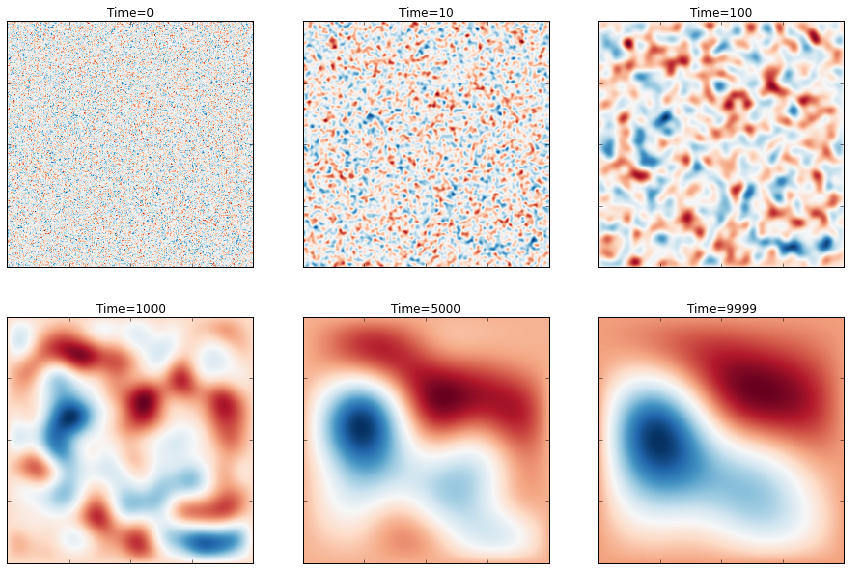

In [6]:
rm = pdeSolver()   # instantiate the class

# generate the grid and initialise the field
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X, Y = np.meshgrid(x, y)

# Initial data
u=np.random.randn(N*N, 1);

# construct the laplacian
L = rm.laplacian(N)

# Integrate
rm.integrate(L, x, y, u)

#simulation completed!!

We can also save the plots and then convert the .pngs tp [.gif](https://github.com/rajeshrinet/compPhy/blob/master/notebooks/2014/plots/tdgl.gif) using,

**convert -delay 10 -loop 0 *.png double-pendulum.gif**

## Boundary value problems (BVP)

We can also solve BVPs using scikits.bvp_solver. This is described separately while discussing [TASEPs](https://github.com/rajeshrinet/compPhy/blob/master/notebooks/2014/AsymmetricSimpleExclusionProcesses.ipynb).

